<a href="https://colab.research.google.com/github/estherkxy/GA_Projects/blob/main/Capstone/code/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

Notebook 1/6

## Executive Summary

In recent years, social media has exploded providing millions of people with the convenience and avenue to express their opinions and views from anywhere, anytime. [Twitter](https://en.wikipedia.org/wiki/Twitter) for example, is one social media platform in which users can post and interact with messages known as 'tweets'. Even though only registered users can post, like or retweet tweets, non-registered users are still able to access and read tweets that are set to be publicly available. 

With social media being steadily on the rise, the question then begs; how can we then leverage on this growth and make [social listening](https://business.twitter.com/en/blog/how-to-use-social-listening.html) a key part of our social media strategy. Be it either in terms of marketing or product monitoring or even customer satisfaction monitoring. Social listening is imperative to any social media strategy. Why? Because, whether you know it or not, conversations about your brand are already happening.



On Twitter, tweets also include sentiments which refers to emotions, feelings, attitude or opinion. [Sentiment analysis](https://ijcset.net/docs/Volumes/volume7issue9/ijcset2017070901.pdf) is then study of emotions and opinions generated from the corresponding text. Basically, the idea is to analyze the tweets together with its corresponding sentiments and then use it to train a model which can be used to predict sentiments from new tweets. While tweets are generally shorter than blog posts/new articles which makes it a good for a starter project like this, tweets can also be tricky to deal with as it contains slang words, misspellings, emojis and repeated characters (eg. RT). 

For this project, we will look at tweets related to Apple (@Apple, #AAPL etc.) and present the results of machine learning and deep learning algorithms through the classification of the sentiment of tweets under supervision with the help of preprocessing steps needed in order to achieve high precision of predictions. 

## Data Description

`tw`/`train_df`:

The training dataset was obtained from [dataworld](https://data.world/crowdflower/apple-twitter-sentiment). This dataset takes a look into the sentiment around Apple, based on tweets containing #AAPL, @apple, etc. Contributors were given a tweet and asked whether the user was positive, negative, or neutral about Apple. 

`test_df`:
The testing dataset was obtained from [kaggle](https://www.kaggle.com/kerneler/starter-apple-twitter-sentiment-texts-b9dd711b-8/data). 

### Data Dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|sentiment|`bool`|train/test|Sentiment of tweet: 0 for Non-negative tweets; 1 for Negative tweets|
|date|`obj`|train|Date & time of tweet|
|text|`obj`|train/test|Tweet posted|


In [ ]:
!pip install transformers
!pip install tweet-preprocessor

  Using cached transformers-4.16.2-py3-none-any.whl (3.5 MB)
  Using cached tokenizers-0.11.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (6.8 MB)
  Using cached huggingface_hub-0.4.0-py3-none-any.whl (67 kB)
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Using cached sacremoses-0.0.47-py2.py3-none-any.whl (895 kB)
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# Importing libraries needed for data cleaning and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import collections
import transformers
import preprocessor as p
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
#from IPython.display import IFrame
from collections import Counter
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading datasets
tw = pd.read_csv('./drive/My Drive/GA/capstone/data/tweets_train.csv', 
                 encoding = 'latin-1')
test_df = pd.read_csv('./drive/My Drive/GA/capstone/data/tweets_test.csv')

# Data Cleaning & Preprocessing

In [ ]:
# Creating a dataframe for cleaning purposes while keeping the original dataset
train_df = tw
print(train_df.shape)
train_df.head()

(3804, 3)


,sentiment,date,text
0,0,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,0,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,0,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...
3,0,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...
4,0,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
# Reclassifying the target sentiments to binary (0: non-negative, 1: negative)
train_df['sentiment'].replace(1,0, inplace = True)
train_df['sentiment'].replace(-1,1, inplace = True)
train_df.head()

,sentiment,date,text
0,0,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,0,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,0,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...
3,0,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...
4,0,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
# Dropping of duplicate tweets
train_df.drop_duplicates(subset='text',keep='last',inplace=True)
train_df.reset_index(drop=True,inplace=True)
# To lowercase 
train_df = train_df.applymap(lambda s:s.lower() if type(s) == str else s)
train_df.shape

(3142, 3)

In [ ]:
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(train_df.shape[0]))

# Display 5 random rows from the data.
train_df.sample(5, random_state=2)

Number of training sentences: 3,142



,sentiment,date,text
1368,0,thu dec 04 21:50:31 +0000 2014,@onerepublic @apple you haven't figured out ...
1247,0,thu dec 04 18:25:04 +0000 2014,"#iphone6, 6 #plus trigger spike in #apple sale..."
1866,0,sat dec 06 03:43:06 +0000 2014,"@marxculture @appleuk_ @apple ugh, i'm no long..."
2419,1,mon dec 08 12:33:43 +0000 2014,former apple inc. supply manager sentenced to ...
313,1,tue dec 02 17:28:23 +0000 2014,my phone keeps fucking freezing @apple


In [ ]:
# Cleaning the tweets of links, handles and solo numeric and nonalphanumeric 
import regex as re
p.set_options(p.OPT.URL, p.OPT.RESERVED, p.OPT.EMOJI, p.OPT.SMILEY)
train_df['text']=[p.clean(x) for x in train_df['text']]
train_df['text']=[re.sub
                  (r'(&amp;)|(&lt;)|(b&gt;)|([!?.@#_,:/]*[!?.@#_,:/])|([0-9])',
                   "",x) for x in train_df['text']]
test_df['text']=[p.clean(x) for x in test_df['text']]
test_df['text']=[re.sub
                 (r'(&amp;)|(&lt;)|(b&gt;)|([!?.@#_,:/]*[!?.@#_,:/])|([0-9])',
                  "",x) for x in test_df['text']]


In [ ]:
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(train_df.shape[0]))

# Display 5 random rows from the data.
train_df.sample(5, random_state=2)

Number of training sentences: 3,142



,sentiment,date,text
1368,0,thu dec 04 21:50:31 +0000 2014,onerepublic apple you haven't figured out that...
1247,0,thu dec 04 18:25:04 +0000 2014,iphone plus trigger spike in apple sales worl...
1866,0,sat dec 06 03:43:06 +0000 2014,marxculture appleuk apple ugh i'm no longer a ...
2419,1,mon dec 08 12:33:43 +0000 2014,former apple inc supply manager sentenced to p...
313,1,tue dec 02 17:28:23 +0000 2014,my phone keeps fucking freezing apple


In [ ]:
# Exporting cleaned dataset
train_df.to_csv('./drive/My Drive/GA/capstone/data/train_tweets_clean.csv')

# EDA

Looking at the distribution of tweets in the training dataset

#### Analyzing sentiment distribution

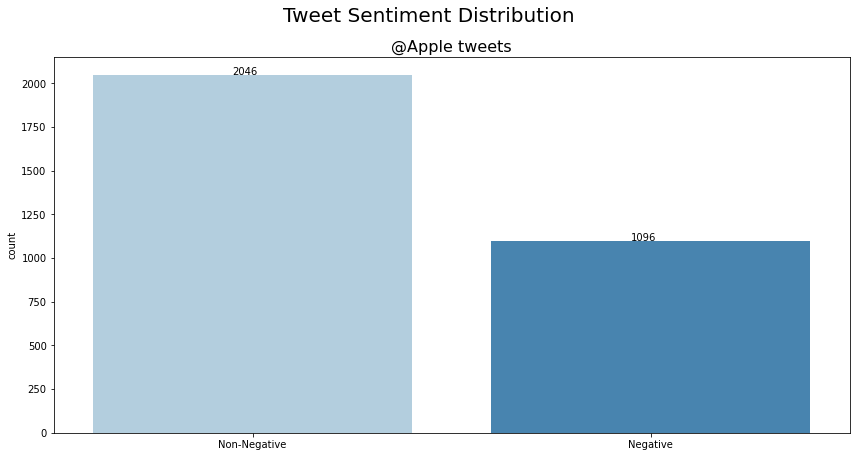

In [ ]:
# Plotting sentiment distribution
fig = plt.figure(figsize=(12,6))
ncount = len(train_df)
#ax = ax.ravel()
g1 = sns.countplot(data=train_df, x=train_df['sentiment'], palette='Blues')
g1.set_xticklabels(['Non-Negative', 'Negative'])
g1.set_title('@Apple tweets', fontsize=16)
g1.set_xlabel('')
plt.suptitle('Tweet Sentiment Distribution', fontsize=20, x=0.5, y=1.05)
for p in g1.patches:
    g1.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+0.35, p.get_height()+1.5))
plt.tight_layout()

#### Analyzing tweet length

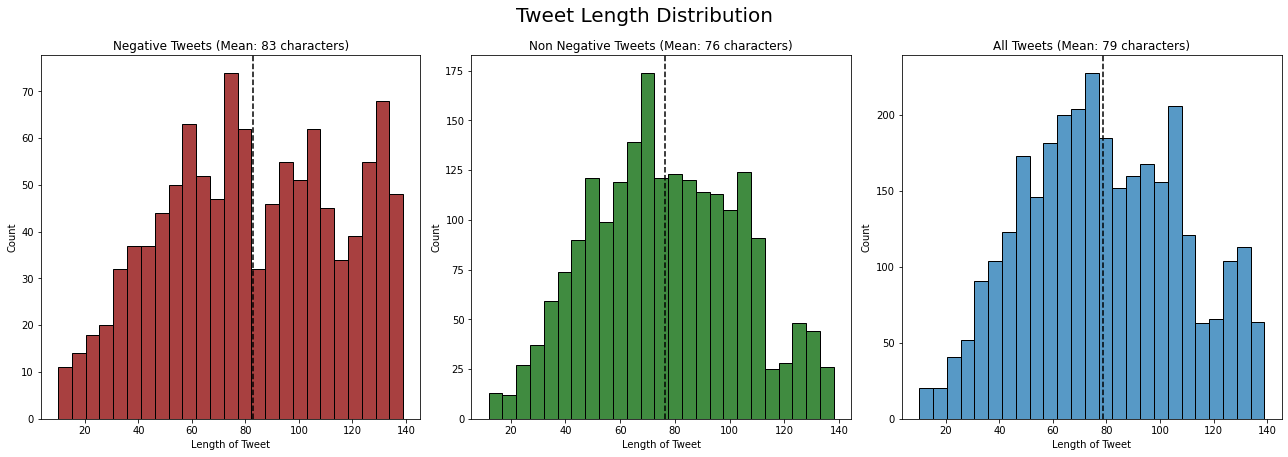

In [ ]:
# Plotting the distribution of tweet lengths
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharey=False)
ax = ax.ravel()

neg_df = train_df[train_df['sentiment'] == 1]
nonneg_df = train_df[train_df['sentiment'] == 0]
    
# Plot negative tweets df   
g1 = sns.histplot(data=neg_df, x=neg_df['text'].str.len(), ax = ax[0], 
                  bins=25, color='darkred')
mean_1 = neg_df['text'].str.len().mean()
ax[0].axvline(mean_1, ls='--', color='black')
g1.set_title(f'Negative Tweets (Mean: {round(mean_1)} characters)')
g1.set_xlabel(f'Length of Tweet')
    
# # Plot neutral tweets df
# g2 = sns.histplot(data=neu_df, x=neu_df['text'].str.len(), ax = ax[1], bins=25, color='darkorange')
# mean_2 = neu_df['text'].str.len().mean()
# ax[1].axvline(mean_2, ls='--', color='black')
# g2.set_title(f'Neutral Tweets (Mean: {round(mean_2)} characters)')
# g2.set_xlabel(f'Length of Tweet')
# plt.suptitle('Average Tweet Length', fontsize=20)
# plt.tight_layout()

# Plot non negative tweets df
g3 = sns.histplot(data=nonneg_df, x=nonneg_df['text'].str.len(), ax = ax[1], 
                  bins=25, color='darkgreen')
mean_3 = nonneg_df['text'].str.len().mean()
ax[1].axvline(mean_3, ls='--', color='black')
g3.set_title(f'Non Negative Tweets (Mean: {round(mean_3)} characters)')
g3.set_xlabel(f'Length of Tweet')
plt.suptitle('Average Tweet Length', fontsize=20)
plt.tight_layout()

# Plot overall tweets df
g4 = sns.histplot(data=train_df, x=train_df['text'].str.len(), ax = ax[2], 
                  bins=25)
mean_4 = train_df['text'].str.len().mean()
ax[2].axvline(mean_4, ls='--', color='black')
g4.set_title(f'All Tweets (Mean: {round(mean_4)} characters)')
g4.set_xlabel(f'Length of Tweet')

plt.suptitle('Tweet Length Distribution', fontsize=20, x=0.5, y=1.05)
plt.tight_layout()

It is interesting to note that negative tweets are on average longer than non-negative tweets.

Also interesting to note that non-negative tweets have a mode of around 70 characters and while it is below mean, the non-negative tweets have a more normal looking distribution. This is in contrast with the distribution of the negative tweets where the distribution looks to be bimodal (75 and 130), with some skewness to the left.  

In [ ]:
# Function to see how many words are in the body.
def word_count(series):
    list_tokens = [w.lower() for w in series]
    string_tokens = str(list_tokens)
    tokens = BeautifulSoup(string_tokens).get_text()
    return tokens

In [ ]:
len(word_count(train_df['text']).split())

42991

In [ ]:
stop_words = stopwords.words('english')
extra_words = ['get', 'a', 'it', 'why', 'wont', 'u', 'ee', 'apple', 'aapl', 
               'via', 'inc', 'make', 'rt']
stop_words.extend(extra_words)
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def status_words(status):
    '''takes a series and cleans the text data '''
    
    review_text = BeautifulSoup(status).get_text()
    # Removed HTML
    
    words = review_text.lower().split()
    # Tokenize without official tokenizer
    
    stops = set(stop_words)
    # Remove Stopwords
    
    meaningful_words = [lemmatizer.lemmatize(w) for w in words if w not in stops]
   # meaningful_words = [stemmer.stem(w) for w in words if w not in stops]
            # tried both the stemmer and the lemmatizer
    return(' '.join(meaningful_words))

In [ ]:
train_df['text'] = train_df['text'].map(status_words)

In [ ]:
# Example to show the difference after processing the data
print(tw['text'][0])
print()
print(train_df['text'][0])

#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx

aaplthe best steve job email ever


A function was created to get the top n-grams from the two topics. `CountVectorizer` was used here. 

In [ ]:
# Create function to get top tokens
def plot_top_words(df, col, n, n_gram_range, title, palette='tab10'):
    def get_top_n_words(corpus, n=n, k=n_gram_range):     
        vec = CountVectorizer(ngram_range=(k,k), 
                              stop_words = stop_words).fit(corpus)     
        bag_of_words = vec.transform(corpus)     
        sum_words = bag_of_words.sum(axis=0)      
        words_freq = [(word, sum_words[0, idx]) for word, 
                      idx in vec.vocabulary_.items()]    
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
        return words_freq[:n]
    temp_df = pd.DataFrame(data=get_top_n_words(df[col], n), 
                           columns=['word','freq'])
    plt.figure(figsize=(10,6))
    sns.barplot(data=temp_df, y='word', x='freq', palette=palette)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(title, fontsize=18)

### Top words

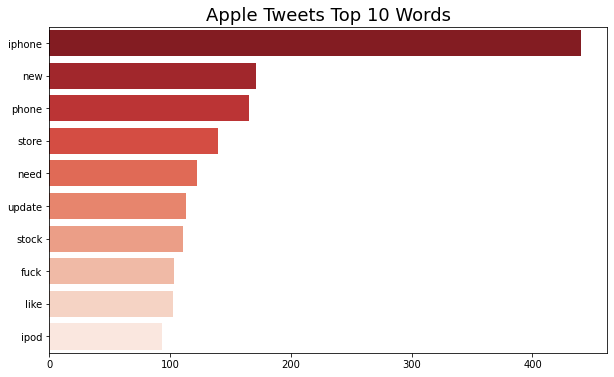

In [ ]:
plot_top_words(train_df,'text', 10, 1, 'Apple Tweets Top 10 Words', 'Reds_r')

### Top Bigrams

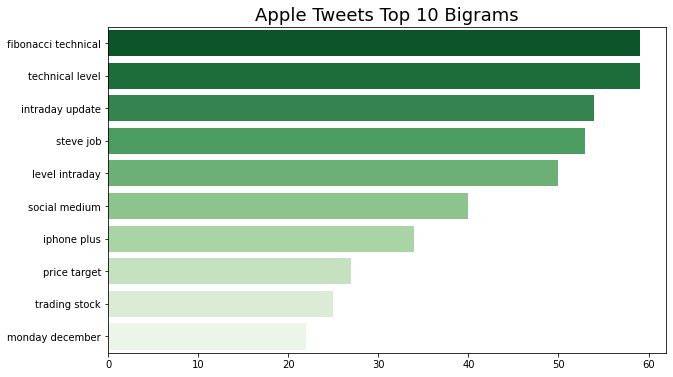

In [ ]:
plot_top_words(train_df,'text', 10, 2, 'Apple Tweets Top 10 Bigrams', 
               palette='Greens_r')


### Top Trigrams

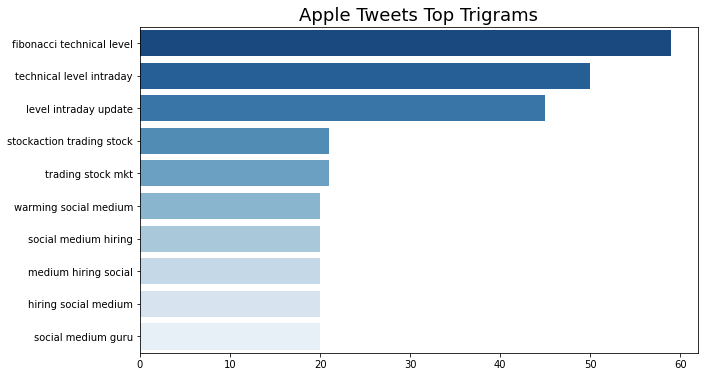

In [ ]:
plot_top_words(train_df, 'text', 10, 3, 'Apple Tweets Top Trigrams', 'Blues_r')

The analysis of n-grams for the tweets have some interesting points to note. For example, when looking at single words, the top words tend to lean towards being product ('phone', 'ipod', 'stock') related. However, when looking at the top bigrams and trigrams, these lean towards being more stock/trading ('fibonacci technical', 'intraday update') related.

Note: 
- Intraday is often used to refer to the new highs and lows of any particular security. 
- Fibonacci analysis is the study of identifying potential support and resistance levels in the future based on past price trends and reversals. 

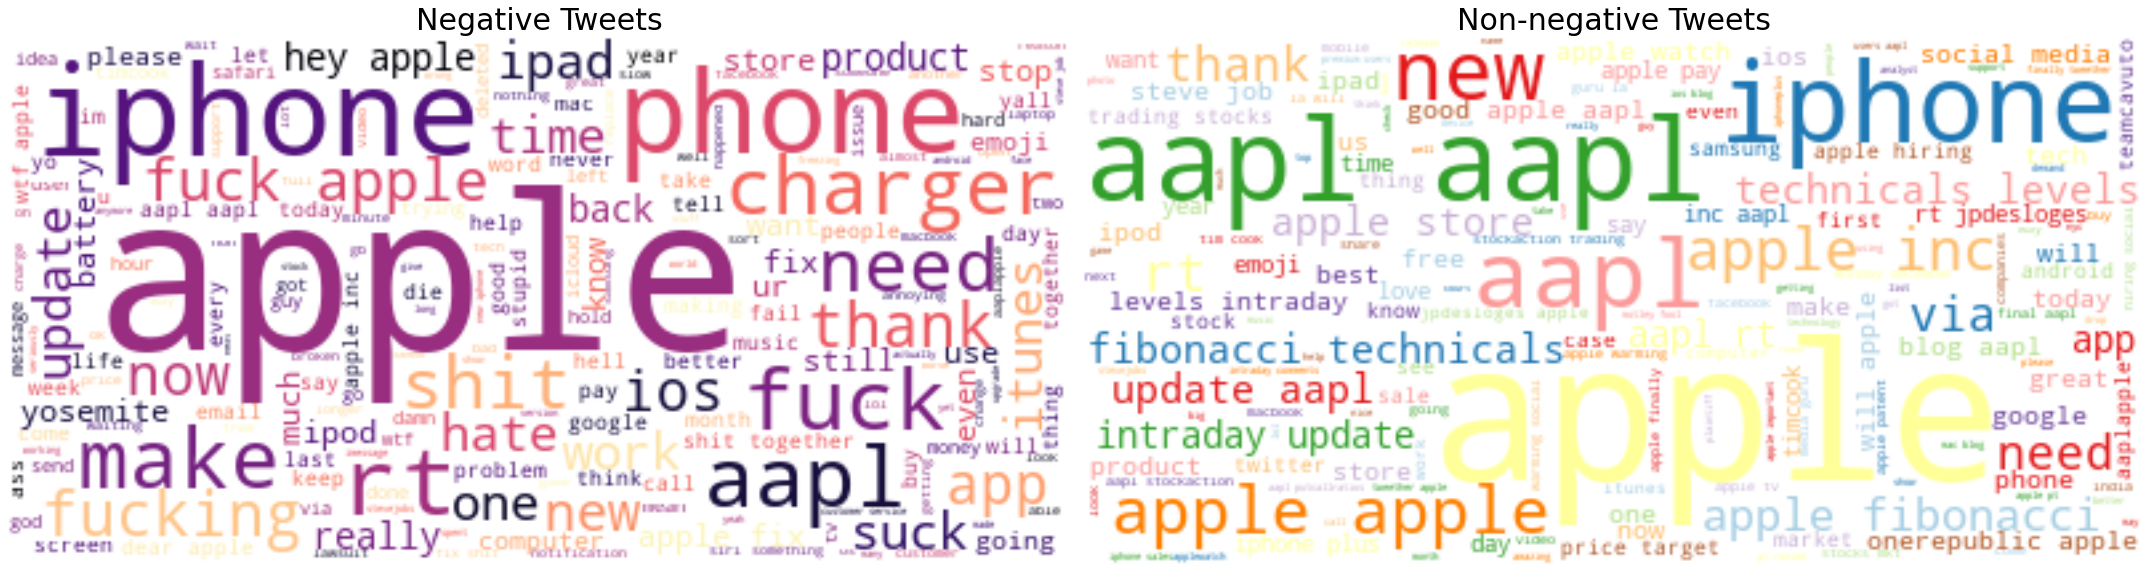

In [ ]:
# Generate a word cloud image
from wordcloud import WordCloud
# word cloud for negative words
wordcloud1 = WordCloud(background_color="white", colormap='magma').generate(' '.join(neg_df['text']))

# word cloud for positive words
wordcloud2 = WordCloud(background_color="white", colormap='Paired').generate(' '.join(nonneg_df['text']))

# Display the generated image:
# the matplotlib way:
fig, ax = plt.subplots(1, 2, figsize=(30,30))

ax[0].imshow(wordcloud1, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title('Negative Tweets', fontsize=30)

ax[1].imshow(wordcloud2, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title('Non-negative Tweets', fontsize=30)
plt.tight_layout();

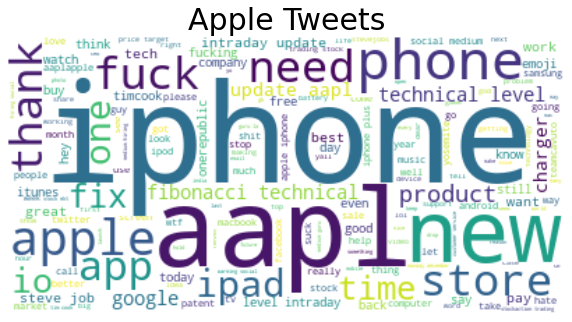

In [ ]:
# Generate a word cloud image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(' '.join(train_df['text']))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Apple Tweets', fontsize=30)
plt.show()